## Final Project Submission

Please fill out:
* Student name: John Kundycki
* Student pace: Full Time
* Instructor name: Rafael Carrasco
* Blog post URL:


For this project I will be following OSEMN
##### OSEMN:
Obtain - Gather Data from relevant resources \
Scrub - Clean data to formats that machine understands \
Explore - Find significant patterns and trends using statistical methods\
Model - Construct models to predict and forecast\
Interpret - Put the results into good use

# OBTAIN

In [250]:
#Import Libraries that may be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('dark_background')

In [251]:
#Read the file containing the data and convert to pd object
data = pd.read_csv('kc_house_data.csv')
pd.set_option('display.max_columns', 999)

In [252]:
#First look at the data
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [253]:
#Check shape to see # of rows and columns
data.shape

(21597, 21)

In [254]:
#Check the columns to better understand what is being worked with
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Included with the data was a file that provides information about each column:

# Column Names and descriptions for King County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

<img src="images/kingcounty.jpg">

King County is the most populous county in Washington with it's seat at Seattle.

# SCRUB

The data was scrubbed in a separate notebook. To see the intricacies of the data cleaning, check out SCRUB.ipynb.

In [255]:
df = pd.read_csv('scrubbed_kc_house_data.csv')

In [256]:
#Checking shape to see if data imported correctly
df.shape

(21420, 22)

In [257]:
#Drop the index column created from saving
df = df.drop(['Unnamed: 0'], axis=1)

# EXPLORE

In [258]:
#Import all libraries that might be needed and change the plt style to seaborn
plt.style.use('seaborn')

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import math

In [259]:
#drop id
df = df.drop(['id'], axis=1)

## Question 1: Does renovation have a noticeable effect on price?

In [260]:
#Create a column with a 0 if the house has not been renovated or a 1 if the house has been renovated
df['renovated'] = np.zeros(shape=df.shape[0])

yrs = []
for i in df.yr_renovated:
    if i != 0:
        yrs.append('Renovated')
    else:
        yrs.append('Not Renovated')
df.renovated = yrs

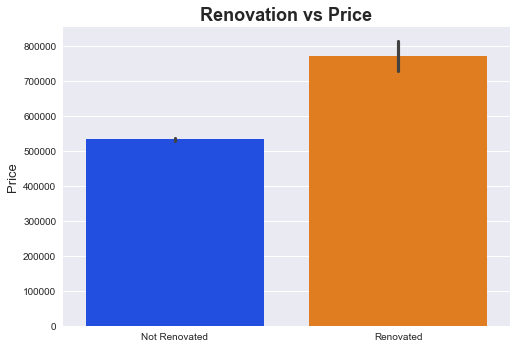

In [261]:
sns.barplot(x="renovated", y="price", data=df, palette='bright')
plt.title('Renovation vs Price', fontweight='bold',fontsize=18)
plt.xlabel('',fontsize=14)
plt.ylabel('Price',fontsize=13)
plt.show()

In [262]:
noren = df.loc[(df['renovated'] == 'Not Renovated')]
ren = df.loc[(df['renovated'] == 'Renovated')]

In [263]:
print('Mean price of house without renovation:',np.round(noren['price'].mean()))
print('Median price of house without renovation:',noren['price'].median())
print('Mean price of house with renovation:',np.round(ren['price'].mean()))
print('Median price of house with renovation:',ren['price'].median())
print("\n")
print("Renovating a house in King's County has a mean price increase of $", np.round(ren['price'].mean()-noren['price'].mean()),"or",np.round(ren['price'].mean()/noren['price'].mean()*100),"percent")

Mean price of house without renovation: 533664.0
Median price of house without renovation: 450000.0
Mean price of house with renovation: 771086.0
Median price of house with renovation: 612200.0


Renovating a house in King's County has a mean price increase of $ 237423.0 or 144.0 percent


### Conclusion 1:

A 144% mean increase in house price is a noticeable effect, therefore, renovating a house in King County tends to have a significant effect on price. 

## Question 2: Is there a difference in price between a house built in a given time period versus a house renovated in that same time period?

In [264]:
#Create bins for yr_built and yr_renovated so we can group data into time periods.

bins1 = [1950., 1980., 1990., 2000., 2010.,2015.]
bins2 = [1950., 1980., 1990., 2000., 2010.,2015.]
periods1 = ['1950-1980','1980-1989','1990-1999','2000-2009','2010-2015']
periods2 = ['1950-1980','1980-1989','1990-1999','2000-2009','2010-2015']

df['yr_built_per'] = pd.cut(df['yr_built'], bins1, labels=periods1, right=False)
df['yr_ren_per'] = pd.cut(df['yr_renovated'], bins2, labels=periods2, right=False)

In [265]:
builtprice_1950 = df[df['yr_built_per'] == '1950-1980']['price'].mean()
builtprice_1980 = df[df['yr_built_per'] == '1980-1989']['price'].mean()
builtprice_1990 = df[df['yr_built_per'] == '1990-1999']['price'].mean()
builtprice_2000 = df[df['yr_built_per'] == '2000-2009']['price'].mean()
builtprice_2010 = df[df['yr_built_per'] == '2010-2015']['price'].mean()
builtpricemeans = [builtprice_1950,builtprice_1980,builtprice_1990,builtprice_2000,builtprice_2010]

renprice_1950 = df[df['yr_ren_per'] == '1950-1980']['price'].mean()
renprice_1980 = df[df['yr_ren_per'] == '1980-1989']['price'].mean()
renprice_1990 = df[df['yr_ren_per'] == '1990-1999']['price'].mean()
renprice_2000 = df[df['yr_ren_per'] == '2000-2009']['price'].mean()
renprice_2010 = df[df['yr_ren_per'] == '2010-2015']['price'].mean()
renpricemeans = [renprice_1950,renprice_1980,renprice_1990,renprice_2000,renprice_2010]

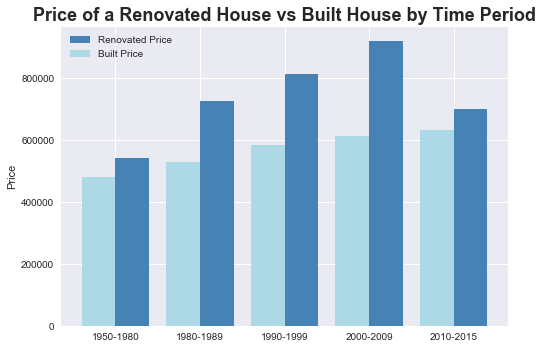

In [266]:
fig = plt.figure()
ax = fig.add_subplot(111)
width = 0.4
ypos = np.arange(len(periods1))
rects1 = ax.bar(ypos+0.2, renpricemeans,width, color='steelblue')
rects2 = ax.bar(ypos-0.2, builtpricemeans,width, color='lightblue')


ax.set_ylabel('Price')
ax.set_title('Price of a Renovated House vs Built House by Time Period', fontweight='bold',fontsize=18)
plt.xticks(ypos,periods1)
ax.set_xticklabels( ('1950-1980','1980-1989','1990-1999','2000-2009','2010-2015') )

ax.legend( (rects1[0], rects2[0]), ('Renovated Price', 'Built Price') )

plt.show()

### Conclusion 2:

There seems to be a signficantly larger price to houses that were renovated in a time period compared to houses that were newly built in that same time period. It looks as if the gap in price is growing more and more for each time period until 2010-2015. This could be due to the fact that less time has passed compared to the other groupings of time.

## Question 3: Is there a difference in price based on geographical location in King's County?

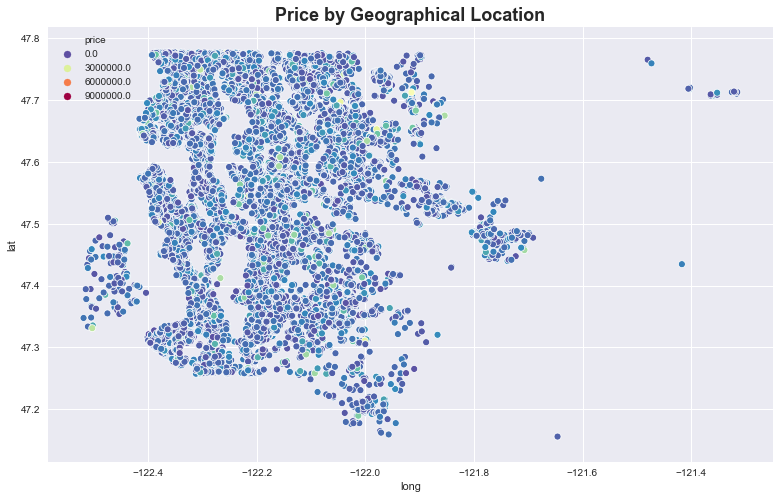

In [267]:
#Call heat map with grid in the back to better visualize where to create our North and South split
plt.figure(figsize=(13,8))
sns.scatterplot(df['long'], df['lat'], hue=data['price'], palette='Spectral_r')
plt.title("Price by Geographical Location", fontweight='bold', fontsize=18)
plt.show()

Plotting the latitudes and longitudes from the dataset have provided a heatmap of the area in terms of price. With the map visualized, it looks like it would be interesting if the County was split into North and South at latitude 47.5.

In [268]:
df['North'] = np.zeros(shape=df.shape[0])

In [269]:
north = []

for i in df.lat:
    if i > 47.5:
        north.append('North')
    else:
        north.append('South')
df.North = north

In [270]:
south = df.loc[(df['North'] == 'South')]
north = df.loc[(df['North'] == 'North')]

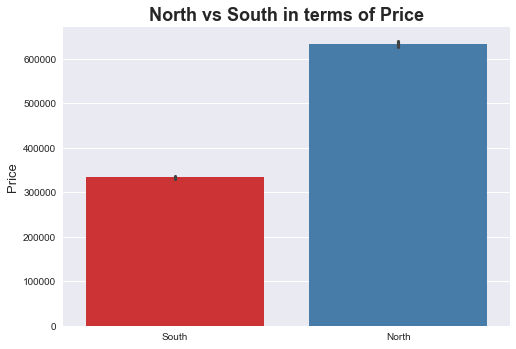

In [271]:
g = sns.barplot(x="North", y="price", data=df, palette='Set1')
plt.title('North vs South in terms of Price', fontweight='bold', fontsize=18)
plt.xlabel('',fontsize=14)
plt.ylabel('Price', fontsize=13)
plt.show()

The graph above shows the mean price difference in houses in the North, the category labeled 1, versus the houses in the South, the category labeled 0. The county was split at latitude 47.5.

In [272]:
print('Mean price of house in the Southern half of Seattle:',np.round(south['price'].mean()))
print('Mean price of house in the Northern half of Seattle:',np.round(north['price'].mean()))
print('Mean difference of',np.round(north['price'].mean()-south['price'].mean()),'dollars.')
print('Mean ratio of',np.round(north['price'].mean()/south['price'].mean()*100),'percent.')

Mean price of house in the Southern half of Seattle: 333396.0
Mean price of house in the Northern half of Seattle: 633391.0
Mean difference of 299995.0 dollars.
Mean ratio of 190.0 percent.


The houses in the northern half of Seattle are valued considerably higher than the southern half.

### Are houses in the north valued higher simply because of location or is it because of another factor?

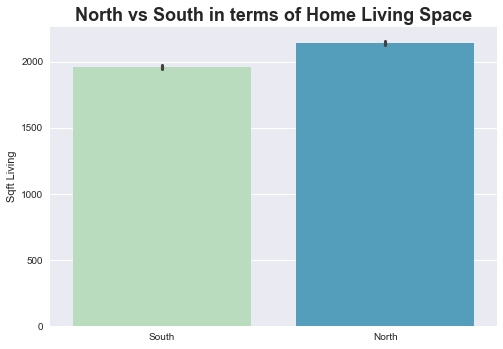

In [273]:
sns.barplot(x="North", y="sqft_living", data=df, palette='GnBu')
plt.title('North vs South in terms of Home Living Space', fontweight='bold', fontsize=18)
plt.xlabel('',fontsize=14)
plt.ylabel('Sqft Living')
plt.show()

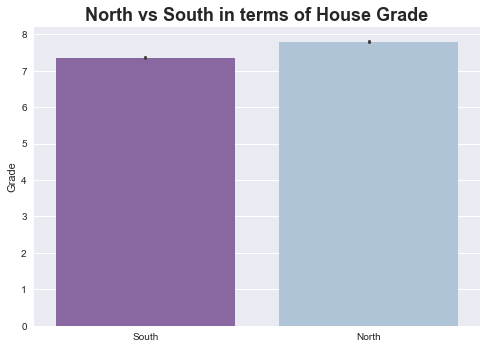

In [274]:
sns.barplot(x="North", y="grade", data=df, palette='BuPu_r')
plt.title('North vs South in terms of House Grade', fontweight='bold', fontsize=18)
plt.xlabel('',fontsize=14)
plt.ylabel('Grade')
plt.show()

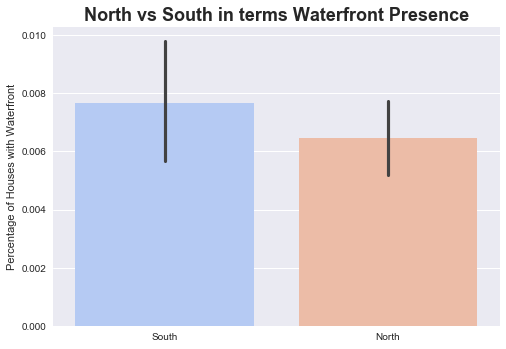

In [275]:
sns.barplot(x="North", y="waterfront", data=df, palette='coolwarm')
plt.title('North vs South in terms Waterfront Presence', fontweight='bold', fontsize=18)
plt.xlabel('',fontsize=14)
plt.ylabel('Percentage of Houses with Waterfront')
plt.show()

### Conclusion 3:

Houses in the North seem to have a slightly higher mean amount of square footage per home and a slightly higher mean grade. Unexpectedly, when comparing the heatmap to the map of King's County provided above, it would not be expected that more houses in the South contain more waterfronts than houses in the North because of the presence of Lake Washington and Lake Sammamish. While cleaning the data, the waterfront column was comprised of mostly zeroes and because of what was discovered here, I believe a lot of the waterfront data is missing.

## Multicolinearity

Multicolinearity will be explored and dealt with so that a viable model can be built. To start, the seaborn heatmap will be used to see what variables may have multicolinearity.

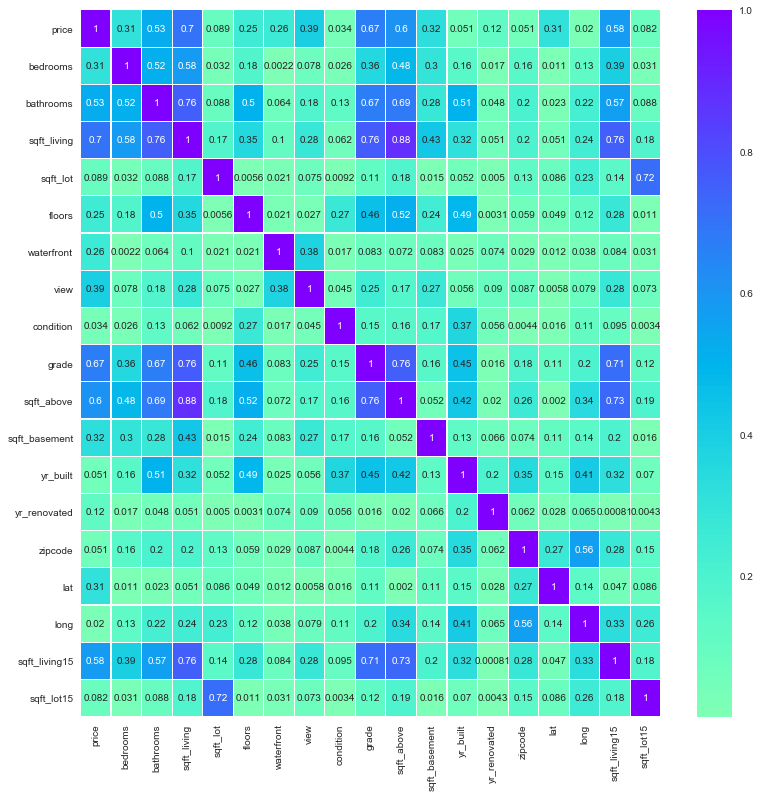

In [276]:
#Create heat map showing absolute correlation to get an idea of how the data interrelates and to see which features
#have a higher correlation with price.
plt.figure(figsize=(13,13))
sns.heatmap(df.corr().abs(), center=0, annot=True, linewidths=.1, cmap='rainbow_r');
plt.autoscale()
plt.show()

The heatmap shows the absolute coefficient of correlation between all the features (as well as the target, price).
This is useful to find intercorrelation between the features that would undermine the statistical significance of our indepedent variables which could cause problems when trying to fit our model and interpret the results. According to Learn.co, a correlation of 0.75 or higher is considered to be a high correlation between independent variables.

Variables with a correlation above 0.75:
1. sqft_living and bathrooms
2. sqft_living and grade
3. sqft_living and sqft_above
4. sqft_living and sqft_living15

I will get rid of the columns correlate with sqft_living, because although they are not quite as highly intercorrelated, they are still highly correlated among themselves. I will also get rid of the columns that I made for data exploration.

In [277]:
#Drop colums with that are highly intercorrelated (>=0.75)
df.drop(['North','yr_renovated', 'yr_ren_per','yr_built_per', 'bathrooms','sqft_above','sqft_living15','renovated','grade'], axis=1, inplace=True)

In [278]:
#Look at remaining columns
df.head(3)

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,zipcode,lat,long,sqft_lot15
0,5/6/2014,78000.0,2,780,16344,1.0,0.0,0.0,1,0.0,1942,98168,47.4739,-122.280,10387
1,5/23/2014,80000.0,1,430,5050,1.0,0.0,0.0,2,0.0,1912,98014,47.6499,-121.909,7500
2,3/24/2015,81000.0,2,730,9975,1.0,0.0,0.0,1,0.0,1943,98168,47.4808,-122.315,9000


I will drop additional columns. The date column will be dropped because it will not be used in this analysis. I will also drop the waterfront column because I do not believe the data accurately reflects the houses in our dataset. When cleaning, less than a percentage of houses were supposedly on a waterfront. Looking at the map of Seattle made from our datapoints, there is clearly more than a percent's worth of houses that should be on a waterfront. Additionally, the sqft_lot15 will be dropped because although not quite 0.75, it is still to close to sqft_lot and the information about the sqft_footage of the nearest 15 neighbours seems less important than the sqft_footage of lots themselves. Lastly, long will be removed because it has the lowest correlation to price and it will just bring noise into our model.

In [279]:
#Drop columns described above
df.drop(['date','waterfront','sqft_lot15','long'], axis=1, inplace=True)

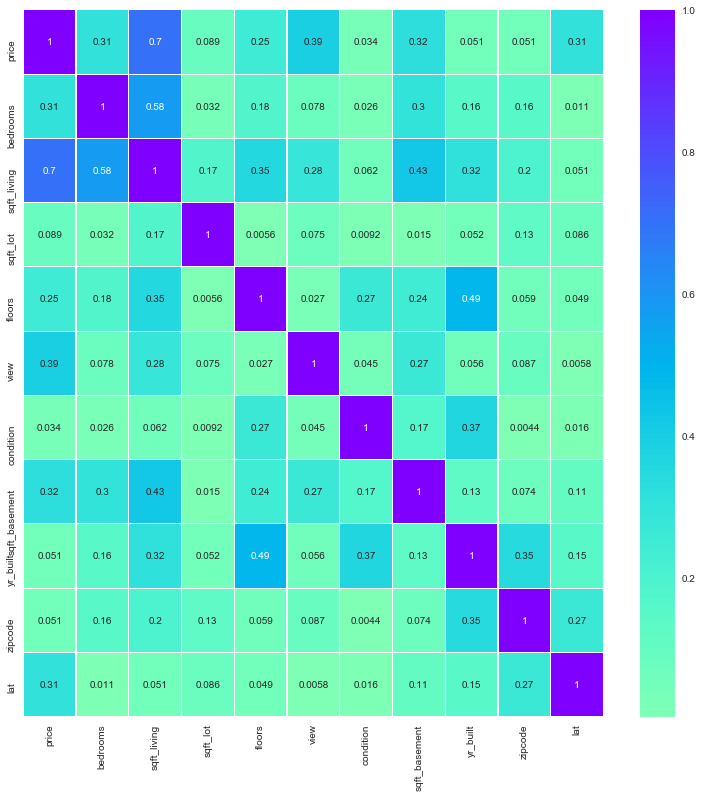

In [280]:
#One last look at the heatmap with the removed features
plt.figure(figsize=(13,13))
sns.heatmap(df.corr().abs(), center=0, annot=True, linewidths=.1, cmap='rainbow_r');
plt.autoscale()
plt.show()

## Check distribution for continuous predictors

First, the data will be inspected to determine which variables are continuous and which are categorical.

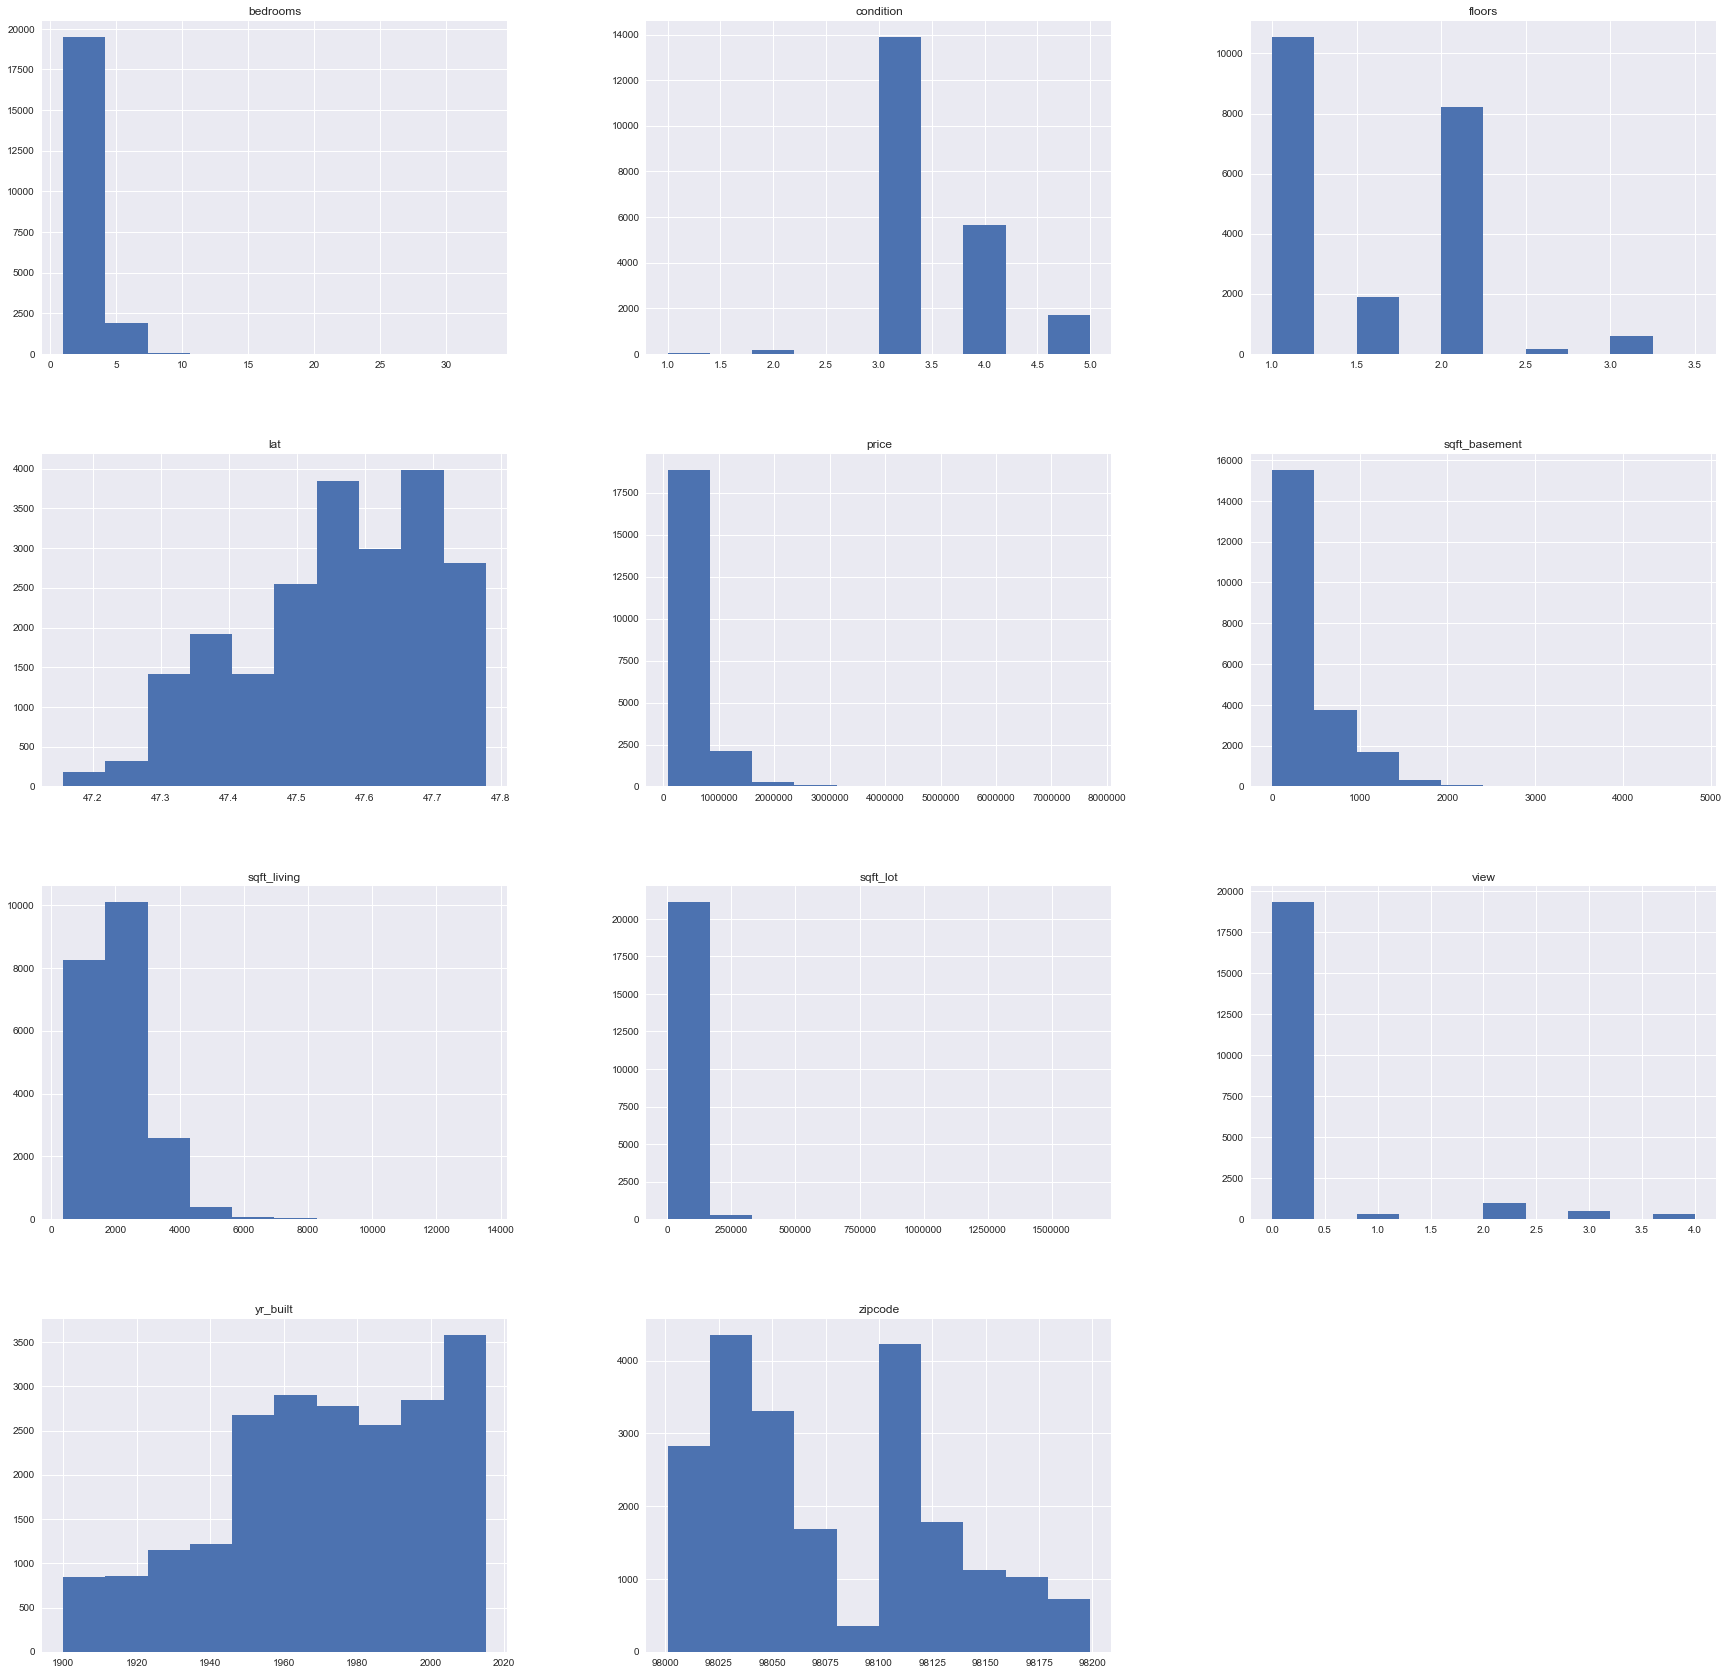

In [281]:
df.hist(figsize = [30,30])
plt.show()

In [282]:
#Columns that containing zero-inflated variables are cumbersome to work with, so they will be removed.
#The view column is not only zero-inflated but probably is inaccurate, with most homes in our dataframe never having been
#viewed.
df.drop(['sqft_lot','sqft_basement','view'], axis=1, inplace=True)

In [283]:
#Create lists of categories for continuous and categorical columns
cont_cols = ['bedrooms','sqft_living','floors','yr_built','lat']
cat_cols = ['condition','zipcode']

C:\Users\John\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


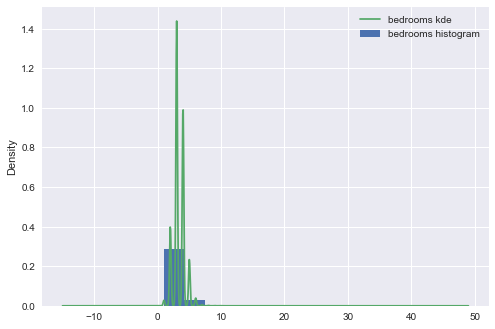

C:\Users\John\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


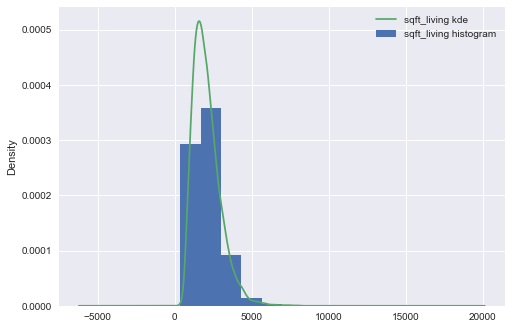

C:\Users\John\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


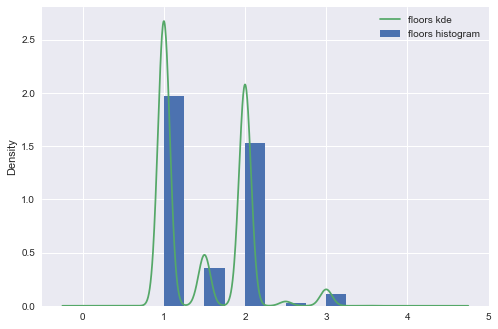

C:\Users\John\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


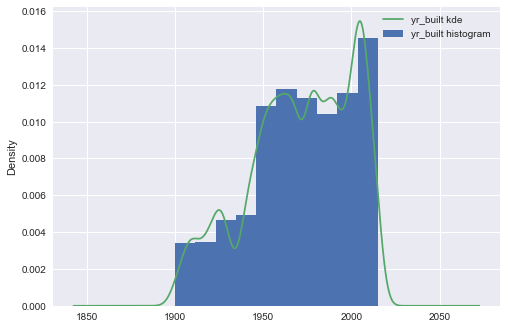

C:\Users\John\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


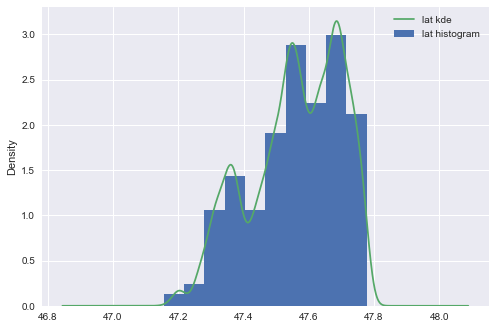

In [284]:
for column in cont_cols:
    df[column].plot.hist(normed=True, label = column+' histogram')
    df[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

See if log transformations can improve normality performance of each continuous predictor.

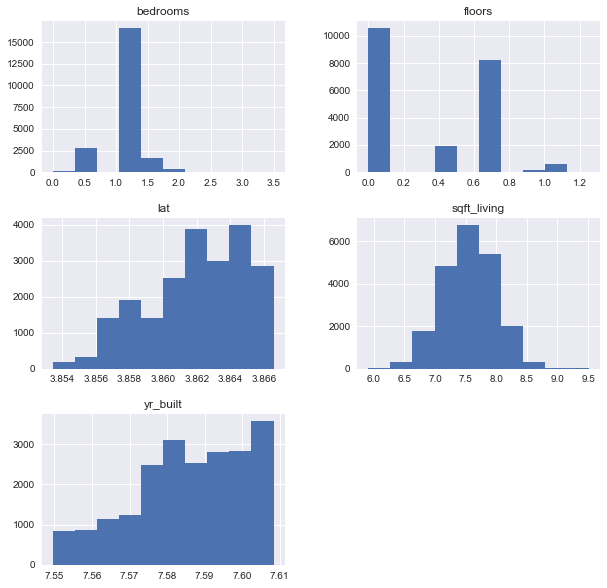

In [285]:
#Use log transformation to see if normality performance can be improved for each variable
df_log= pd.DataFrame([])
df_log['bedrooms'] = np.log(df['bedrooms'])
df_log['floors'] = np.log(df['floors'])
df_log['lat'] = np.log(df['lat'])
df_log['sqft_living'] = np.log(df['sqft_living'])
df_log['yr_built'] = np.log(df['yr_built'])
df_log.hist(figsize = [10,10]);

Skewness seems to have improved for bedrooms and sqft_living so they will keep the log transformation and we can test them against their original data to see if they better fit the model. The other variables will not be log transformed as it did not seem to have much of an effect. The continuous variables seem roughly normal which should be normal enough for OLS testing.

## Test the linearity assumption

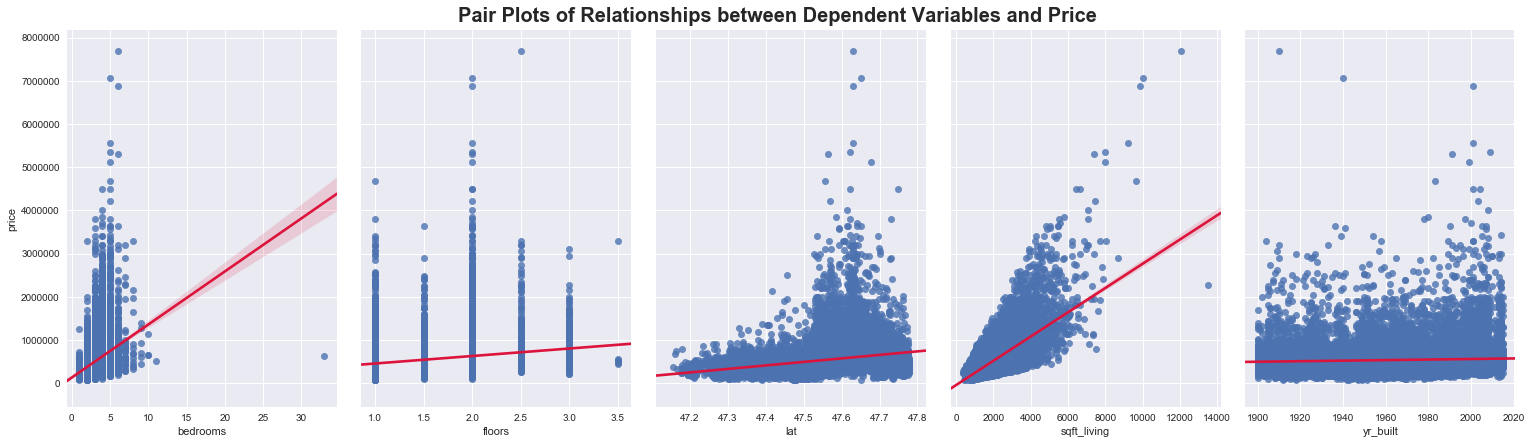

In [286]:
sns.pairplot(x_vars=['bedrooms', 'floors', 'lat','sqft_living','yr_built'], 
             y_vars='price', data=df, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)

plt.suptitle('Pair Plots of Relationships between Dependent Variables and Price', size=20, weight='bold', y=1.02)
plt.show();

There seem to be a rough linear relationships between price and the variables. Latitude, sqft_living and yr_built seem to have the better fitting linear relationships with price. Bedrooms and floors do not seem to have a clear linear relationship with price. Something that stands out in all of these pair plots, are outliers.

# MODEL

Before proceeding to modeling, here is a refresher for the assumptions required for Linear Regression:
1. LINEARITY: The relationship between the independent and dependent variables needs to be linear
2. NORMALITY: The linear regression analysis requires all variables to be normal.
3. MULTICOLINEARITY: There is little to no multicolinearity in the data.
4. HOMOSCEDASTICITY: Residuals must be equal across the regression line.

## One-hot encoding categorical variables

In [287]:
#View categorical variables
cat_cols

['condition', 'zipcode']

In [288]:
#Set cols to category type so that Python can regonizes their strings as categories
df.condition = df.condition.astype('category')
df.zipcode = df.zipcode.astype('category')

In [289]:
#Create dummies
condition_dummy = pd.get_dummies(data=df['condition'] ,prefix='condition', drop_first=False)
zipcode_dummy = pd.get_dummies(data=df['zipcode'] ,prefix='zipcode', drop_first=False)

In [290]:
#Remove categorical columns now that dummies are made
df = df.drop(['condition','zipcode'], axis=1)

In [291]:
#Concatenate the df and the dummies
df = pd.concat([df, condition_dummy, zipcode_dummy], axis=1)

## Multiple Linear Regression

In [292]:
#Import statsmodels
import statsmodels.api as sm

In [293]:
#Run OLS Regression on df
y = df['price']
x = df.drop(['price'], axis=1)
linreg = sm.OLS(y,x).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     781.6
Date:                Sat, 15 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:44:42   Log-Likelihood:            -2.9043e+05
No. Observations:               21420   AIC:                         5.810e+05
Df Residuals:                   21341   BIC:                         5.816e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -4.685e+04   1735.149    -26.998      0.000   -5.02e+04   -4.34e+04
sqft_living     283.0614      1.960    144.383      0.000     279.219     286.904
floors         7378.2049   3162.592      2.333      0.020    1179.287    1.36e+04
yr_built       -536.5021     65.027     -8.250      0.000    -663.960    -409.044
lat            1.373e+05   7.41e+04      1.853      0.064   -7925.854    2.83e+05
condition_1   -5.065e+06   3.29e+06     -1.539      0.124   -1.15e+07    1.39e+06
condition_2   -5.015e+06   3.29e+06     -1.524      0.127   -1.15e+07    1.43e+06
condition_3   -5.007e+06   3.29e+06     -1.522      0.128   -1.15e+07    1.44e+06
condition_4   -4.997e+06   3.29e+06     -1.519      0.129   -1.14e+07    1.45e+06
condition_5   -4.959e+06   3.29e+06     -1.507      0.132   -1.14e+07    1.49e+06
zipcode_98001 -5.402e+05   2.17e+05     -2.487      0.013   -9.66e+05   -1.14e+05
zipcode_98002 -5.253e+05   2.17e+05     -2.417      0.016   -9.51e+05   -9.93e+04
zipcode_98003 -5.372e+05   2.18e+05     -2.468      0.014   -9.64e+05   -1.11e+05
zipcode_98004  2.218e+05    2.4e+05      0.924      0.355   -2.48e+05    6.92e+05
zipcode_98005 -2.551e+05    2.4e+05     -1.064      0.287   -7.25e+05    2.15e+05
zipcode_98006 -2.611e+05   2.36e+05     -1.109      0.268   -7.23e+05    2.01e+05
zipcode_98007 -3.121e+05    2.4e+05     -1.301      0.193   -7.82e+05    1.58e+05
zipcode_98008 -2.776e+05    2.4e+05     -1.158      0.247   -7.47e+05    1.92e+05
zipcode_98010  -4.77e+05    2.2e+05     -2.173      0.030   -9.07e+05   -4.68e+04
zipcode_98011 -4.822e+05    2.5e+05     -1.927      0.054   -9.73e+05    8380.470
zipcode_98014 -4.932e+05   2.44e+05     -2.018      0.044   -9.72e+05   -1.42e+04
zipcode_98019 -5.256e+05   2.49e+05     -2.111      0.035   -1.01e+06   -3.76e+04
zipcode_98022 -4.959e+05    2.1e+05     -2.361      0.018   -9.08e+05   -8.42e+04
zipcode_98023 -5.584e+05   2.17e+05     -2.572      0.010   -9.84e+05   -1.33e+05
zipcode_98024  -4.06e+05   2.36e+05     -1.718      0.086   -8.69e+05    5.72e+04
zipcode_98027 -3.996e+05   2.33e+05     -1.716      0.086   -8.56e+05    5.68e+04
zipcode_98028 -4.802e+05    2.5e+05     -1.919      0.055   -9.71e+05    1.02e+04
zipcode_98029  -3.41e+05   2.36e+05     -1.447      0.148   -8.03e+05    1.21e+05
zipcode_98030 -5.425e+05   2.22e+05     -2.447      0.014   -9.77e+05   -1.08e+05
zipcode_98031 -5.387e+05   2.24e+05     -2.402      0.016   -9.78e+05   -9.91e+04
zipcode_98032 -5.424e+05   2.22e+05     -2.439      0.015   -9.78e+05   -1.07e+05
zipcode_98033 -2.001e+05   2.45e+05     -0.818      0.413    -6.8e+05    2.79e+05
zipcode_98034 -3.762e+05   2.48e+05     -1.520      0.129   -8.61e+05    1.09e+05
zipcode_98038 -5.226e+05   2.22e+05     -2.358      0.018   -9.57e+05   -8.81e+04
zipcode_98039   7.96e+05   2.42e+05      3.291   

All of our features seem statistically significant with a p-value less than 0.05 except several invidiual zipcodes dummies. The zipcodes will be kept as a majority of the other dummies are statistically significant.

In [294]:
#Run OLS Regression on df to see if removing renovated has had any effect
y = df['price']
x = df.drop(['price'], axis=1)
linreg = sm.OLS(y,x).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     781.6
Date:                Sat, 15 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:44:42   Log-Likelihood:            -2.9043e+05
No. Observations:               21420   AIC:                         5.810e+05
Df Residuals:                   21341   BIC:                         5.816e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -4.685e+04   1735.149    -26.998      0.000   -5.02e+04   -4.34e+04
sqft_living     283.0614      1.960    144.383      0.000     279.219     286.904
floors         7378.2049   3162.592      2.333      0.020    1179.287    1.36e+04
yr_built       -536.5021     65.027     -8.250      0.000    -663.960    -409.044
lat            1.373e+05   7.41e+04      1.853      0.064   -7925.854    2.83e+05
condition_1   -5.065e+06   3.29e+06     -1.539      0.124   -1.15e+07    1.39e+06
condition_2   -5.015e+06   3.29e+06     -1.524      0.127   -1.15e+07    1.43e+06
condition_3   -5.007e+06   3.29e+06     -1.522      0.128   -1.15e+07    1.44e+06
condition_4   -4.997e+06   3.29e+06     -1.519      0.129   -1.14e+07    1.45e+06
condition_5   -4.959e+06   3.29e+06     -1.507      0.132   -1.14e+07    1.49e+06
zipcode_98001 -5.402e+05   2.17e+05     -2.487      0.013   -9.66e+05   -1.14e+05
zipcode_98002 -5.253e+05   2.17e+05     -2.417      0.016   -9.51e+05   -9.93e+04
zipcode_98003 -5.372e+05   2.18e+05     -2.468      0.014   -9.64e+05   -1.11e+05
zipcode_98004  2.218e+05    2.4e+05      0.924      0.355   -2.48e+05    6.92e+05
zipcode_98005 -2.551e+05    2.4e+05     -1.064      0.287   -7.25e+05    2.15e+05
zipcode_98006 -2.611e+05   2.36e+05     -1.109      0.268   -7.23e+05    2.01e+05
zipcode_98007 -3.121e+05    2.4e+05     -1.301      0.193   -7.82e+05    1.58e+05
zipcode_98008 -2.776e+05    2.4e+05     -1.158      0.247   -7.47e+05    1.92e+05
zipcode_98010  -4.77e+05    2.2e+05     -2.173      0.030   -9.07e+05   -4.68e+04
zipcode_98011 -4.822e+05    2.5e+05     -1.927      0.054   -9.73e+05    8380.470
zipcode_98014 -4.932e+05   2.44e+05     -2.018      0.044   -9.72e+05   -1.42e+04
zipcode_98019 -5.256e+05   2.49e+05     -2.111      0.035   -1.01e+06   -3.76e+04
zipcode_98022 -4.959e+05    2.1e+05     -2.361      0.018   -9.08e+05   -8.42e+04
zipcode_98023 -5.584e+05   2.17e+05     -2.572      0.010   -9.84e+05   -1.33e+05
zipcode_98024  -4.06e+05   2.36e+05     -1.718      0.086   -8.69e+05    5.72e+04
zipcode_98027 -3.996e+05   2.33e+05     -1.716      0.086   -8.56e+05    5.68e+04
zipcode_98028 -4.802e+05    2.5e+05     -1.919      0.055   -9.71e+05    1.02e+04
zipcode_98029  -3.41e+05   2.36e+05     -1.447      0.148   -8.03e+05    1.21e+05
zipcode_98030 -5.425e+05   2.22e+05     -2.447      0.014   -9.77e+05   -1.08e+05
zipcode_98031 -5.387e+05   2.24e+05     -2.402      0.016   -9.78e+05   -9.91e+04
zipcode_98032 -5.424e+05   2.22e+05     -2.439      0.015   -9.78e+05   -1.07e+05
zipcode_98033 -2.001e+05   2.45e+05     -0.818      0.413    -6.8e+05    2.79e+05
zipcode_98034 -3.762e+05   2.48e+05     -1.520      0.129   -8.61e+05    1.09e+05
zipcode_98038 -5.226e+05   2.22e+05     -2.358      0.018   -9.57e+05   -8.81e+04
zipcode_98039   7.96e+05   2.42e+05      3.291   

A change in R-squared of 0.001 from removing renovated. Now continuous and categorical variables will be tested separately to further explore the model.

### OLS for Categorical Variables

In [295]:
y = df['price']
x = df.drop(['price','sqft_living','floors','bedrooms','yr_built','lat'], axis=1)
linreg = sm.OLS(y,x).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     204.3
Date:                Sat, 15 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:44:43   Log-Likelihood:            -2.9921e+05
No. Observations:               21420   AIC:                         5.986e+05
Df Residuals:                   21346   BIC:                         5.992e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
condition_1     3.09e+05   5.28e+04      5.853      0.000    2.05e+05    4.12e+05
condition_2    3.971e+05    2.2e+04     18.040      0.000    3.54e+05     4.4e+05
condition_3    5.389e+05   2755.362    195.582      0.000    5.33e+05    5.44e+05
condition_4    4.988e+05   4003.256    124.602      0.000    4.91e+05    5.07e+05
condition_5     5.73e+05   7029.968     81.508      0.000    5.59e+05    5.87e+05
zipcode_98001 -2.457e+05   1.49e+04    -16.483      0.000   -2.75e+05   -2.16e+05
zipcode_98002 -2.875e+05      2e+04    -14.359      0.000   -3.27e+05   -2.48e+05
zipcode_98003 -2.295e+05   1.69e+04    -13.551      0.000   -2.63e+05   -1.96e+05
zipcode_98004  8.323e+05   1.59e+04     52.444      0.000    8.01e+05    8.63e+05
zipcode_98005  2.892e+05   2.16e+04     13.361      0.000    2.47e+05    3.32e+05
zipcode_98006  3.325e+05   1.28e+04     25.962      0.000    3.07e+05    3.58e+05
zipcode_98007  1.005e+05   2.38e+04      4.228      0.000    5.39e+04    1.47e+05
zipcode_98008  1.234e+05   1.68e+04      7.365      0.000    9.06e+04    1.56e+05
zipcode_98010 -1.081e+05   2.81e+04     -3.846      0.000   -1.63e+05    -5.3e+04
zipcode_98011 -4.098e+04   2.01e+04     -2.034      0.042   -8.05e+04   -1492.594
zipcode_98014 -7.201e+04   2.52e+04     -2.853      0.004   -1.21e+05   -2.25e+04
zipcode_98019 -1.104e+05   2.04e+04     -5.418      0.000    -1.5e+05   -7.05e+04
zipcode_98022  -2.13e+05   1.84e+04    -11.565      0.000   -2.49e+05   -1.77e+05
zipcode_98023 -2.332e+05   1.28e+04    -18.253      0.000   -2.58e+05   -2.08e+05
zipcode_98024  6.122e+04   3.14e+04      1.947      0.052    -403.797    1.23e+05
zipcode_98027  8.775e+04   1.39e+04      6.297      0.000    6.04e+04    1.15e+05
zipcode_98028 -6.856e+04   1.68e+04     -4.093      0.000   -1.01e+05   -3.57e+04
zipcode_98029  7.786e+04   1.58e+04      4.934      0.000    4.69e+04    1.09e+05
zipcode_98030 -2.292e+05   1.77e+04    -12.964      0.000   -2.64e+05   -1.95e+05
zipcode_98031 -2.247e+05   1.71e+04    -13.147      0.000   -2.58e+05   -1.91e+05
zipcode_98032 -2.673e+05   2.53e+04    -10.582      0.000   -3.17e+05   -2.18e+05
zipcode_98033  2.761e+05   1.36e+04     20.287      0.000    2.49e+05    3.03e+05
zipcode_98034 -7595.0502   1.22e+04     -0.624      0.533   -3.15e+04    1.63e+04
zipcode_98038 -1.665e+05   1.18e+04    -14.152      0.000    -1.9e+05   -1.43e+05
zipcode_98039  1.663e+06   3.99e+04     41.691      0.000    1.58e+06    1.74e+06
zipcode_98040  6.714e+05   1.68e+04     39.981      0.000    6.38e+05    7.04e+05
zipcode_98042 -2.159e+05   1.21e+04    -17.782      0.000    -2.4e+05   -1.92e+05
zipcode_98045 -9.075e+04    1.9e+04     -4.769      0.000   -1.28e+05   -5.34e+04
zipcode_98052  1.189e+05   1.19e+04     10.004      0.000    9.56e+04    1.42e+05
zipcode_98053  1.396e+05   1.42e+04      9.841   

### OLS for Continuous Variables

In [296]:
contdf = pd.DataFrame([])
contdf['bedrooms'] = df['bedrooms']
contdf['floors'] = df['floors']
contdf['yr_built'] = df['yr_built']
contdf['lat'] = df['lat']
contdf['sqft_living'] = df['sqft_living']

In [297]:
y = df['price']
x = contdf
linreg = sm.OLS(y,x).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                          2.714e+04
Date:                Sat, 15 Feb 2020   Prob (F-statistic):                        0.00
Time:                        21:44:43   Log-Likelihood:                     -2.9591e+05
No. Observations:               21420   AIC:                                  5.918e+05
Df Residuals:                   21415   BIC:                                  5.919e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -5.971e+04   2189.985    -27.266      0.000    -6.4e+04   -5.54e+04
floors       7.984e+04   3566.861     22.385      0.000    7.29e+04    8.68e+04
yr_built    -3374.3941     61.276    -55.069      0.000   -3494.499   -3254.289
lat          1.385e+05   2486.665     55.677      0.000    1.34e+05    1.43e+05
sqft_living   331.4903      2.343    141.486      0.000     326.898     336.083
==============================================================================
Omnibus:                    14825.840   Durbin-Watson:                   1.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           602710.246
Skew:                           2.826   Prob(JB):                         0.00
Kurtosis:                      28.365   Cond. No.                     6.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All variables are statistically significant and the continuous variables alone produce a better R-square value. So I will get rid of the categorical variables and see if the continuous variables can be transformed to better predict price.

### Try the log transformations from earlier

In [298]:
#Create a test df
contdf2 = pd.DataFrame([])
contdf2['floors'] = df['floors']
contdf2['yr_built'] = df['yr_built']
contdf2['lat'] = df['lat']
contdf2['bedrooms'] = df_log['bedrooms']
contdf2['sqft_living'] = df_log['sqft_living']

In [299]:
#Run OLS with the log transformed bedrooms and sqft_living
y = df['price']
x = contdf2
linreg = sm.OLS(y,x).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.824
Model:                            OLS   Adj. R-squared (uncentered):              0.824
Method:                 Least Squares   F-statistic:                          2.003e+04
Date:                Sat, 15 Feb 2020   Prob (F-statistic):                        0.00
Time:                        21:44:43   Log-Likelihood:                     -2.9865e+05
No. Observations:               21420   AIC:                                  5.973e+05
Df Residuals:                   21415   BIC:                                  5.974e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
floors       1.013e+05   4050.487     25.018      0.000    9.34e+04    1.09e+05
yr_built    -3599.4629     70.360    -51.158      0.000   -3737.373   -3461.553
lat          5.931e+04   2819.971     21.034      0.000    5.38e+04    6.48e+04
bedrooms    -2.104e+05   8763.147    -24.015      0.000   -2.28e+05   -1.93e+05
sqft_living  6.505e+05   6259.916    103.907      0.000    6.38e+05    6.63e+05
==============================================================================
Omnibus:                    19916.705   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2003528.695
Skew:                           4.162   Prob(JB):                         0.00
Kurtosis:                      49.643   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using the log transformed variables does not seem to have improved the regression.

### Try removing outliers

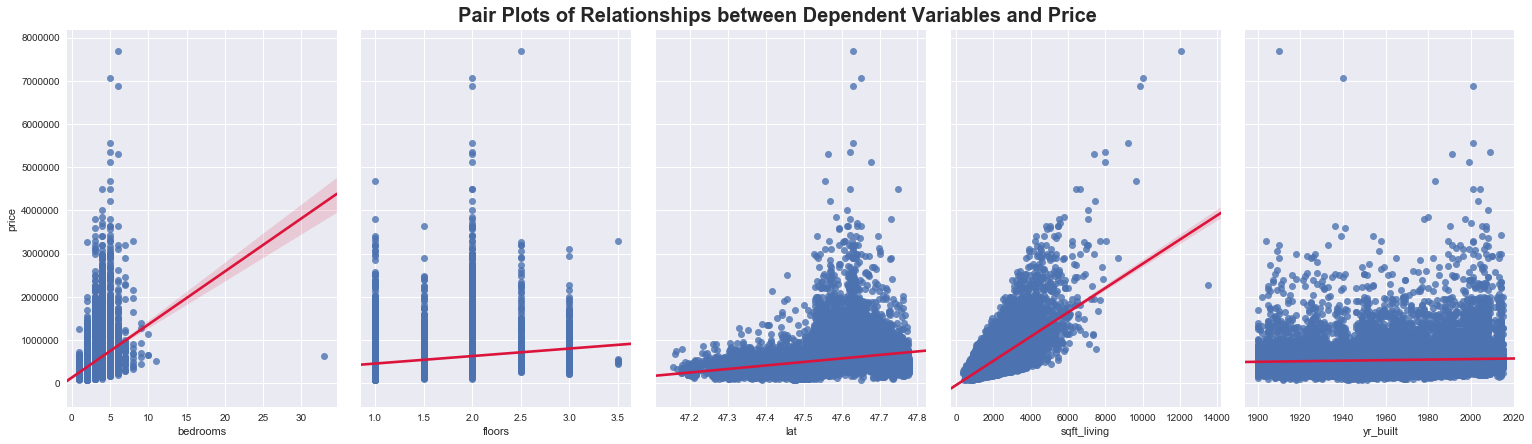

In [300]:
sns.pairplot(x_vars=['bedrooms', 'floors', 'lat','sqft_living','yr_built'], 
             y_vars='price', data=df, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)

plt.suptitle('Pair Plots of Relationships between Dependent Variables and Price', size=20, weight='bold', y=1.02)
plt.show();

From the pairplots above which include a regression line to better view linearity, many outliers can be observed. Perhaps if we remove outliers for price, we can better predict the price. Also, there is a house with over 30 bedrooms for under $700,000. Neat.

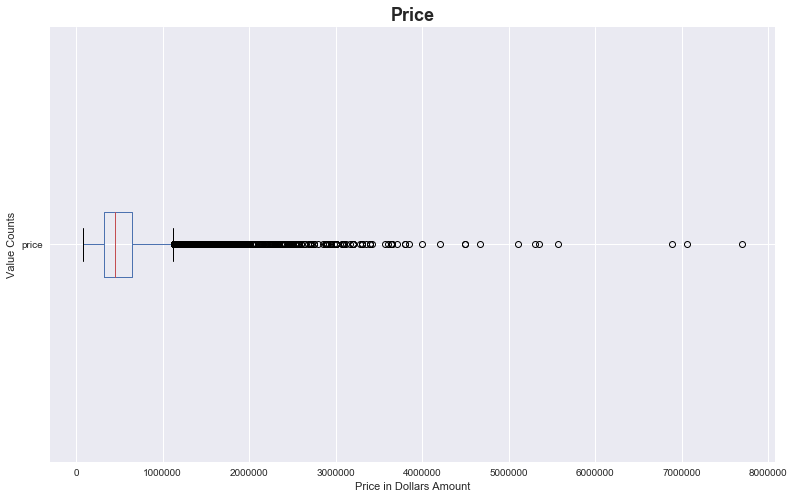

In [301]:
#Check the box and whiskers plot to check for outliers for price
df['price'].plot.box(figsize=[13,8], vert=False)
plt.title('Price', fontweight='bold',fontsize=18)
plt.xlabel('Price in Dollars Amount')
plt.ylabel('Value Counts')
plt.show()

The histogram for price is skewed towards the right.

In [302]:
df['price'].mean()

541866.0313258637

In [303]:
df['price'].describe()

count    2.142000e+04
mean     5.418660e+05
std      3.675586e+05
min      7.800000e+04
25%      3.249500e+05
50%      4.505500e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

We can cut off at the upper maximum of the boxplot (Q3 * 1.5 IQR) to get rid of most of the outliers. The house with over 30 bedrooms will be dropped to get a better visualization of the relationship between bedrooms and price.

In [304]:
#Get the Upper Whisker value
upper_quartile = np.percentile(df['price'], 75)
lower_quartile = np.percentile(df['price'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = df[df<=upper_quartile+1.5*iqr].max()
lower_whisker = df[df>=lower_quartile-1.5*iqr].min()
print('Upper Whisker:',upper_whisker['price'])
print('Lower Whisker:',lower_whisker['price'])

Upper Whisker: 1120000.0
Lower Whisker: 78000.0


In [305]:
#Cut off at the upper maximum
outlierprice = pd.DataFrame([])
outlierprice['price'] = df['price']
outlierprice['floors'] = df['floors']
outlierprice['bedrooms'] = df['bedrooms']
outlierprice['lat'] = df['lat']
outlierprice['sqft_living'] = df['sqft_living']
outlierprice['yr_built'] = df['yr_built']

outliers = outlierprice[outlierprice['price'] > 1120000 ].index
outlierprice.drop(outliers , inplace=True)

outliers2 = outlierprice[outlierprice['bedrooms'] > 30].index
outlierprice.drop(outliers2 , inplace=True)

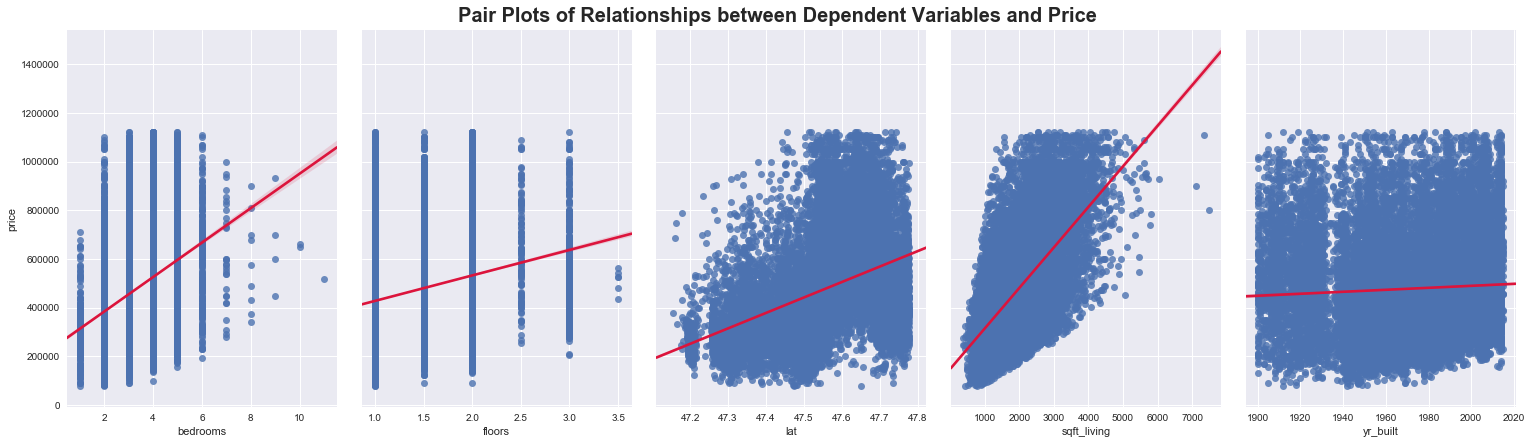

In [306]:
sns.pairplot(x_vars=['bedrooms', 'floors', 'lat','sqft_living','yr_built'], 
             y_vars='price', data=outlierprice, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)

plt.suptitle('Pair Plots of Relationships between Dependent Variables and Price', size=20, weight='bold', y=1.02)
plt.show();

The linear relationship seems to have improved greatly from removing outliers from price. 

In [307]:
#Run OLS after accounting for outliers
y = outlierprice['price']
X = outlierprice.drop(['price'], axis=1)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                          4.619e+04
Date:                Sat, 15 Feb 2020   Prob (F-statistic):                        0.00
Time:                        21:44:56   Log-Likelihood:                     -2.7004e+05
No. Observations:               20267   AIC:                                  5.401e+05
Df Residuals:                   20262   BIC:                                  5.401e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
floors           8e+04   2266.511     35.297      0.000    7.56e+04    8.44e+04
bedrooms    -2.855e+04   1477.412    -19.327      0.000   -3.14e+04   -2.57e+04
lat          1.008e+05   1606.914     62.701      0.000    9.76e+04    1.04e+05
sqft_living   198.1701      1.798    110.220      0.000     194.646     201.694
yr_built    -2399.0821     39.682    -60.457      0.000   -2476.863   -2321.301
==============================================================================
Omnibus:                      863.525   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1104.233
Skew:                           0.452   Prob(JB):                    1.65e-240
Kurtosis:                       3.701   Cond. No.                     6.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Removing outliers has also increase the R-squared value. The condition number is still large, so multicolinearity should be addressed again before continuing to model validation.

### Multicolinearity

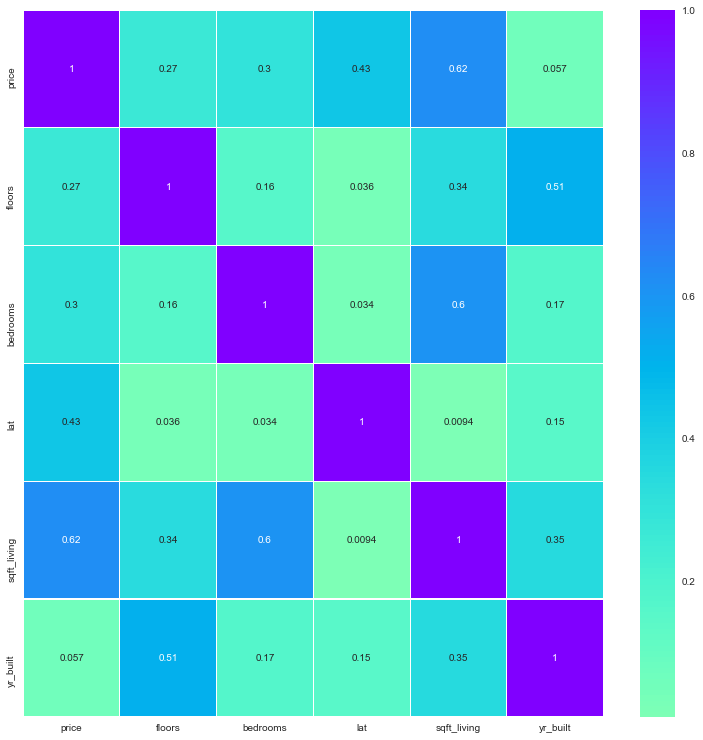

In [308]:
plt.figure(figsize=(13,13))
sns.heatmap(outlierprice.corr().abs(), center=0, annot=True, linewidths=.1, cmap='rainbow_r');
plt.autoscale()
plt.show()

Variance Inflation Factor will be used to determine multicolinearity between the remaining features.

In [309]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [310]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X, vif))

[('floors', 11.740956435174736),
 ('bedrooms', 23.958852582274112),
 ('lat', 5401.217250798751),
 ('sqft_living', 13.488971493410851),
 ('yr_built', 5658.436506019357)]

To get down multicolinearity, the variables that are intercorrelated need to be removed. First, yr_built will be removed.

In [311]:
y = outlierprice['price']
X = outlierprice.drop(['price','yr_built'], axis=1)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                          4.814e+04
Date:                Sat, 15 Feb 2020   Prob (F-statistic):                        0.00
Time:                        21:44:57   Log-Likelihood:                     -2.7172e+05
No. Observations:               20267   AIC:                                  5.434e+05
Df Residuals:                   20263   BIC:                                  5.435e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
floors        2.31e+04   2240.029     10.310      0.000    1.87e+04    2.75e+04
bedrooms    -2.649e+04   1604.676    -16.505      0.000   -2.96e+04   -2.33e+04
lat          3785.7962    106.374     35.589      0.000    3577.294    3994.298
sqft_living   178.1715      1.920     92.797      0.000     174.408     181.935
==============================================================================
Omnibus:                     1040.035   Durbin-Watson:                   0.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1209.097
Skew:                           0.577   Prob(JB):                    2.80e-263
Kurtosis:                       3.318   Cond. No.                     4.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [312]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X, vif))

[('floors', 9.716071859646698),
 ('bedrooms', 23.946011095115608),
 ('lat', 20.052735440727464),
 ('sqft_living', 13.032379263946076)]

The VIF scores are much better, but still high, bedrooms and sqft_living are probably interacting with one another since they have to do with living space. Bedrooms also have the highest VIF, so it will be removed.

In [313]:
y = outlierprice['price']
X = outlierprice.drop(['price','bedrooms','yr_built'], axis=1)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                          6.325e+04
Date:                Sat, 15 Feb 2020   Prob (F-statistic):                        0.00
Time:                        21:44:57   Log-Likelihood:                     -2.7185e+05
No. Observations:               20267   AIC:                                  5.437e+05
Df Residuals:                   20264   BIC:                                  5.437e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
floors       2.524e+04   2251.180     11.213      0.000    2.08e+04    2.97e+04
lat          2642.0411     81.245     32.519      0.000    2482.795    2801.288
sqft_living   159.4793      1.561    102.178      0.000     156.420     162.539
==============================================================================
Omnibus:                      961.610   Durbin-Watson:                   0.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1102.748
Skew:                           0.559   Prob(JB):                    3.48e-240
Kurtosis:                       3.234   Cond. No.                     4.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [314]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X, vif))

[('floors', 9.683345138386573),
 ('lat', 11.542921986219833),
 ('sqft_living', 8.498289677849291)]

These scores are still too high. Floors will be removed as it also has to do with living space and is probably interacting with sqft_living.

In [315]:
y = outlierprice['price']
X = outlierprice.drop(['price','bedrooms','yr_built','floors'], axis=1)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                          9.423e+04
Date:                Sat, 15 Feb 2020   Prob (F-statistic):                        0.00
Time:                        21:44:57   Log-Likelihood:                     -2.7192e+05
No. Observations:               20267   AIC:                                  5.438e+05
Df Residuals:                   20265   BIC:                                  5.439e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
lat          3179.6410     65.790     48.330      0.000    3050.687    3308.595
sqft_living   165.4083      1.473    112.293      0.000     162.521     168.296
==============================================================================
Omnibus:                      924.899   Durbin-Watson:                   0.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1055.063
Skew:                           0.548   Prob(JB):                    7.87e-230
Kurtosis:                       3.216   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [316]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X, vif))

[('lat', 7.522856522753114), ('sqft_living', 7.522856522753114)]

These scores still imply some form of multicollinearity, but it has been severely reduced when compared to the old model with little effect on the R-squared value.

## Regression Model Validation

### Test-train split

In [317]:
#Import train test split and set the train set (20%) and the test set (80%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [318]:
#Check the length of the test/training sets
print(len(X_train), len(X_test), len(y_train), len(y_test))

16213 4054 16213 4054


In [319]:
#Build Models with the training and test data
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [320]:
#Acquire the residuals for both sets of data
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [321]:
#Calculate the Mean Squared Error to see how the residuals of both sets compare
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 18599762406.084057
Test Mean Squarred Error: 18891987116.268826


Both Train and Test Mean Squared Error seem to be close in value.

## K-Fold Cross Validation

In order to deal with the issues that random sampling can introduce into interpreting the quality of the model, K-Fold Cross Validation will be employed to validate the model.

In [322]:
#Use scikit-learn to to get mean squared error from a 5-fold cross-validation of the model.
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
cv_5_results

array([-1.65503783e+10, -1.57560568e+10, -1.50821084e+10, -1.47792037e+10,
       -8.93002831e+10])

The difference in MSE from the 5-fold cross-validation are fairly close in value and are similar to what was observed previously.

## Assumptions for Linear Regression

Before beginning the modeling, the assumptions for linear regression were stated. Now that the model has been created, we can test the assumptions for homoscedasticity and normality.

## Homoscedasticity

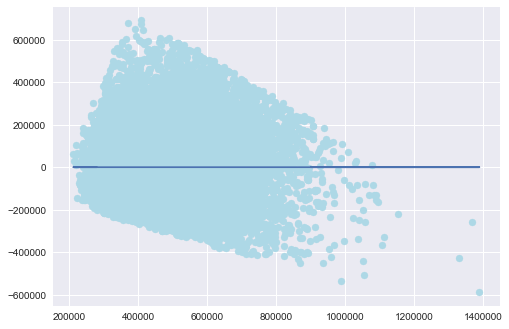

In [323]:
plt.scatter(model.predict(X), model.resid, color='lightblue')
plt.plot(model.predict(X), [0 for i in range(len(outlierprice))])

There appear to be issues, especially at the outliers. The assumption of homoscedasticity has been violated.

## Normality

Test Normality assumptions by creating a QQ-plot

C:\Users\John\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


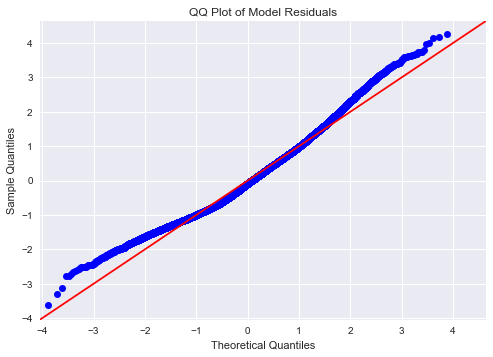

In [324]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot of Model Residuals')
fig.show()

The majority of the residuals seem to to fall well within normality, however, the values at the tails are violating the assumption of normality.

# INTERPRET

## Interpreting the assumptions

Having violated Normality, Linearity, Homoscedasticity and potentially Multicollinearity the model can be described as unreliable at best. Non-linearity can cause predictions that are far from the realm of reality. Heteroscedasticity shows that the variance of the errors is increasing, particularly as price increases and thus the confidence intervals for outliers in price will be very narrow. Finally, there is a bow in the QQ Plot, which implies that the residuals are skewed.

## Potential corrective measures/improvements

It could be that although not linear, there is a discernable pattern that the residuals seem to follow and perhaps more in-depth investigation of non-linear transformation (as attempted with the log transformations) should be explored for a better fitting model. For the issue of Heteroscedasticity, the reality is that this model is trying to predict too wide of a dataset in terms of price and it would probably be best to have multiple models that are designed particularly with different categories of house prices in mind. Both of the fixes aforementioned would probably aid in the skewness of the residuals, and thus providing residuals with better normality performance. Perhaps some of the methods for determining multicolinearity were not robust enough and a more in-depth analysis of which features might do best should be executed.

## Interpreting the OLS Regression Results

In [325]:
y = outlierprice['price']
X = outlierprice.drop(['price','bedrooms','yr_built','floors'], axis=1)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                          9.423e+04
Date:                Sat, 15 Feb 2020   Prob (F-statistic):                        0.00
Time:                        21:44:58   Log-Likelihood:                     -2.7192e+05
No. Observations:               20267   AIC:                                  5.438e+05
Df Residuals:                   20265   BIC:                                  5.439e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
lat          3179.6410     65.790     48.330      0.000    3050.687    3308.595
sqft_living   165.4083      1.473    112.293      0.000     162.521     168.296
==============================================================================
Omnibus:                      924.899   Durbin-Watson:                   0.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1055.063
Skew:                           0.548   Prob(JB):                    7.87e-230
Kurtosis:                       3.216   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Scores:

* R-squared: The proportion of the variance in the dependent variable that is predictable from the indenpendent variables. Approximately 91% of the variance in the price of a house can be predicted from the model.
* F-Statistic: The F-statistic is the ratio of the mean regression sum of squares divided by the mean error of sum squares. With a probability of 0, the null hypothesis that the fit of the intercept only model and my model are equal is rejected.
* Coefficients: The coefficients show the relationship between the independent variable and the dependent variable.  
* p-Values: The p-values are all 0, meaning the indepedent variables are statistically signficant to the model.
* Skew: The skewness is positive which implies a skewness towards the right. With a value between -0.5 and 0.5, the data is pretty symmetrical.
* Kurtosis: The Kurtosis score is about 3, implying that the data fits a normal distribution.
* Jarque-Bera: The Jarque-Bera test is a goodness-of-fit test. Because the Jarque-Bera score is large, this indicates that errors are not normally distributed.
* Condition Number: Measures multicollinearity, the number is large which implies multicollinearity.